In [1]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#importing helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#to check the version of tensorflow
print(tf.__version__)

2.8.2


In [4]:
#load our dataset- Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
#splitting it into training and testing dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
#Shape of the Training Dataset
train_images.shape

(60000, 28, 28)

In [7]:
#length of Training Dataset
len(train_labels)

60000

In [8]:
#Shape of the Testing Dataset
test_images.shape

(10000, 28, 28)

In [9]:
#length of Training Dataset
len(test_images)

10000

In [10]:
#defining classname or categories
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

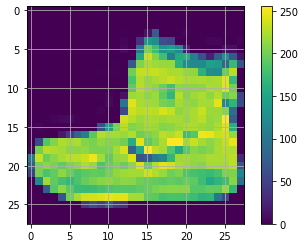

In [11]:
#To Visualize a random training image(training image is 0).//preprocessing the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)

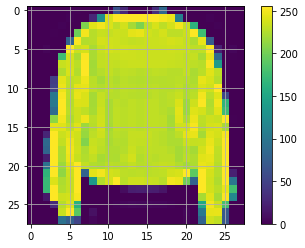

In [12]:
# To Visualize a random training image(training image is 7).//preprocessing the data
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(True)

In [13]:
#to make image pixel value fall in range of 0-1.
train_images = train_images/255.0
test_images = test_images/255.0

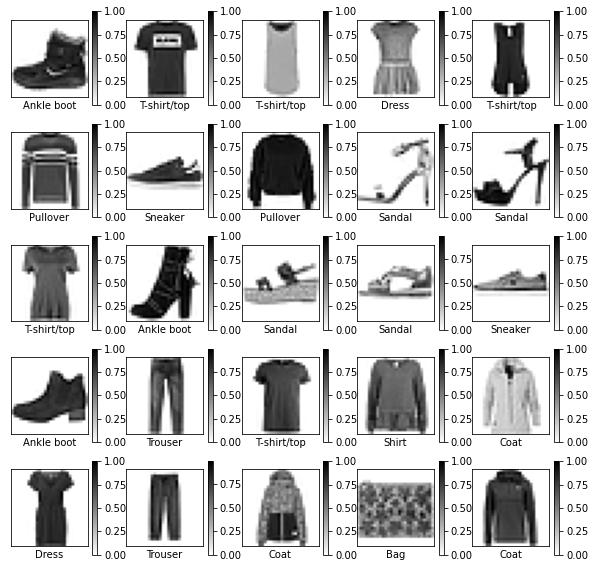

In [14]:
#display first 25 images in a training dataset to check the format of data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(Categories[train_labels[i]])

In [15]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [19]:
#Let's Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
#Let's start training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 139s 73ms/step - loss: 0.4493 - accuracy: 0.8367
Epoch 2/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.3022 - accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2597 - accuracy: 0.9028
Epoch 4/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2268 - accuracy: 0.9147
Epoch 5/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2022 - accuracy: 0.9237
Epoch 6/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1775 - accuracy: 0.9335
Epoch 7/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1592 - accuracy: 0.9385
Epoch 8/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1411 - accuracy: 0.9455
Epoch 9/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1225 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] 

In [21]:
#Let's Compare how the model performs on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
#test acc<train acc.->example of overfitting(performs worst on new data)

313/313 [==============================] - 5s 15ms/step - loss: 0.3235 - accuracy: 0.9129
Test accuracy: 0.9128999710083008


In [22]:
#make predictions on some images.
predictions = model.predict(test_images)

In [23]:
#To check the prediction for the 0th (1st) test image(means 1st prediction)
predictions[0]

array([2.6269972e-11, 4.3943896e-13, 6.3044649e-13, 7.5819993e-13,
       8.0997681e-14, 7.7067783e-09, 4.5591993e-15, 2.4986433e-09,
       3.7113566e-15, 1.0000000e+00], dtype=float32)

In [27]:
#to see which label has highest confidence value
np.argmax(predictions[0])
# means the model is more confident when the image is ankle boot

9

In [25]:
#to see and check test label sees as a correct output
test_labels[0]

9

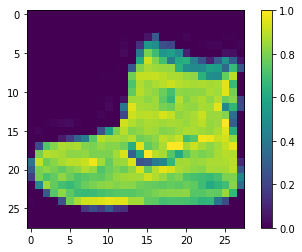

In [26]:
#to see the image of pixels in the range of 0-1(image 0)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#to see the image of pixels in the range of 0-1(image 7)
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#graph to look at the first set of 10 channels
# Plotting the Image, the predicted label, the actual label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                100*np.max(predictions_array),
                                Categories[true_label]),
                                color=color)

In [ ]:
# Plotting the Graph
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
#let's plot several images with the predictions, correct prediction labels are blue and incorrect prediction labels are red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
#use the train model to moke a prediction about a single imagge
img = test_images[0]
print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
# grab image from the dataset
img = (np.expand_dims(img,0))
print(img.shape)

In [ ]:
#Now predict the correct label for this image
#predict the image
predictions_single = model.predict(img)
print(predictions_single)

In [ ]:
# let's grab the prediction for only image in a batch
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), Categories, rotation=45)

np.argmax(predictions_single[0])